# Wildfire Burn Area Prediction
****
## Course: CMPE-255 Data Mining
****
## Team: Data Goblins
+ Arpitha Gurumurthy: SJSU ID - (014642290)
+ Bhuvana Gopala Krishna Basapur: SJSU ID - (013740298)
+ Sheema Murugesh Babu: SJSU ID - (015217176)
****
<div>
<ul>
  <li> <b>Picking up a Dataset:</b> 
      Kaggle is a very good place to find numerous datasets. We chose the US Wildfires Dataset.</li>
  <li>URL: https://www.kaggle.com/rtatman/188-million-us-wildfires.</li>
</ul>
</div>

In [1]:
import sqlite3
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [2]:
# Loading the dataset.
con=sqlite3.connect('wildfire_data.sqlite')
df = pd.read_sql_query("SELECT * FROM Fires", con)
pd.set_option('display.max_columns', None)
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [3]:
# This function takes a DataFrame(df) as input and returns two columns, 
# total missing values and total missing values percentage
total = df.isnull().sum().sort_values(ascending = False)
percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
df2 = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
df2

,Total,Percent
COMPLEX_NAME,1875282,99.72
MTBS_ID,1869462,99.41
MTBS_FIRE_NAME,1869462,99.41
ICS_209_INCIDENT_NUMBER,1854748,98.63
ICS_209_NAME,1854748,98.63
FIRE_CODE,1555636,82.73
LOCAL_FIRE_REPORT_ID,1459286,77.60
CONT_TIME,972173,51.70
FIRE_NAME,957189,50.90
CONT_DOY,891531,47.41


In [4]:
# Dropping all those columns whose missing values are greater than 70%
df = df.drop(['COMPLEX_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
            'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'FIRE_CODE', 'LOCAL_FIRE_REPORT_ID'], axis=1)
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,PNF-47,FOUNTAIN,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,PIGEON,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,021,SLACK,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,6,DEER,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,7,STEVENOT,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [5]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,PNF-47,FOUNTAIN,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,PIGEON,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,021,SLACK,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,6,DEER,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,7,STEVENOT,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [6]:
df.tail()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,009371,ODESSA 2,2015,2457291.5,269,1726,13.0,Missing/Undefined,2457291.5,269.0,1843,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,000366,None,2015,2457300.5,278,0126,9.0,Miscellaneous,NaN,NaN,None,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,000158,None,2015,2457144.5,122,2052,13.0,Missing/Undefined,NaN,NaN,None,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,000380,None,2015,2457309.5,287,2309,13.0,Missing/Undefined,NaN,NaN,None,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...
1880464,1880465,300348399,2015CAIRS26733926,NONFED,ST-CACDF,ST/C&L,USCABDU,San Bernardino Unit,CABDU,CDF - San Bernardino Unit,003225,BARKER BL BIG_BEAR_LAKE_,2015,2457095.5,73,2128,9.0,Miscellaneous,NaN,NaN,None,0.10,A,34.263217,-116.830950,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x1c\xa7\xe8H.5]\xc0...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 32 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_INCIDENT_ID           object 
 11  FIRE_NAME                   object 
 12  FIRE_YEAR                   int64  
 13  DISCOVERY_DATE              float64
 14  DISCOVERY_DOY               int64  
 15  DISCOVERY_TIME              object 
 16  STAT_CAUSE_CODE             float64
 17  STAT_CAUSE_DESCR            object 
 18  CONT_DATE                   float64
 19  CONT_DOY             

# Data Visualizations

In [8]:
#sns.set(style="ticks")
numcols = [
 'LATITUDE',
 'LONGITUDE',
'OWNER_CODE','FIRE_SIZE',  'CONT_DOY',  'CONT_DATE','STAT_CAUSE_CODE', 'DISCOVERY_DOY', 'DISCOVERY_DATE',
       'FIRE_YEAR']
#catcols = ['FIPS_NAME','FIPS_CODE','COUNTY','STATE','OWNER_DESCR','CONT_TIME','STAT_CAUSE_DESCR','DISCOVERY_TIME']
catcols = ['COUNTY','STATE','FIRE_SIZE_CLASS']
# Subset the columns
plot_df = df[numcols+ catcols]
# Few rows of data
plot_df.head()

,LATITUDE,LONGITUDE,OWNER_CODE,FIRE_SIZE,CONT_DOY,CONT_DATE,STAT_CAUSE_CODE,DISCOVERY_DOY,DISCOVERY_DATE,FIRE_YEAR,COUNTY,STATE,FIRE_SIZE_CLASS
0,40.036944,-121.005833,5.0,0.10,33.0,2453403.5,9.0,33,2453403.5,2005,63,CA,A
1,38.933056,-120.404444,5.0,0.25,133.0,2453137.5,1.0,133,2453137.5,2004,61,CA,A
2,38.984167,-120.735556,13.0,0.10,152.0,2453156.5,5.0,152,2453156.5,2004,17,CA,A
3,38.559167,-119.913333,5.0,0.10,185.0,2453189.5,1.0,180,2453184.5,2004,3,CA,A
4,38.559167,-119.933056,5.0,0.10,185.0,2453189.5,1.0,180,2453184.5,2004,3,CA,A


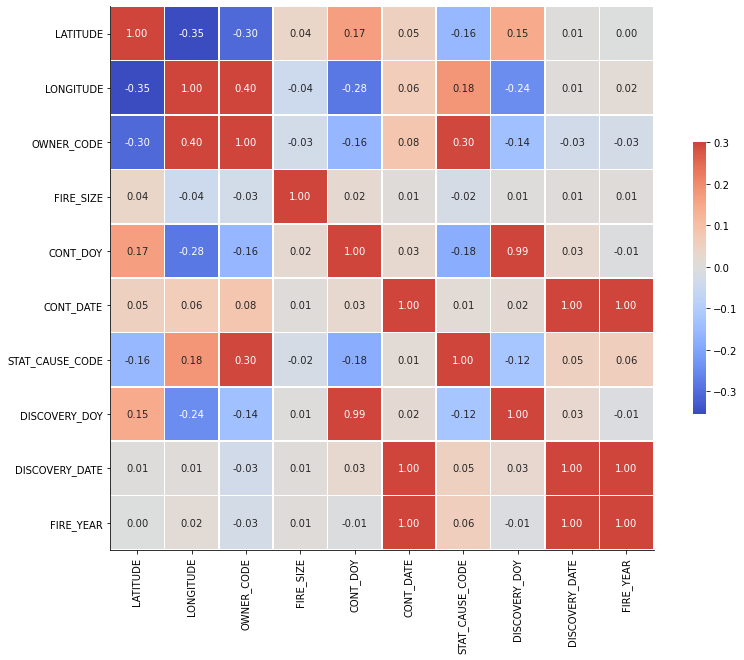

In [9]:
corr = plot_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

In [10]:
def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted



def conditional_entropy(x, y):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    :param x: list / NumPy ndarray / Pandas Series
        A sequence of measurements
    :param y: list / NumPy ndarray / Pandas Series
        A sequence of measurements
    :return: float
    """
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x


def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta


def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True,
                          return_results = False, **kwargs):
    

    dataset = convert(dataset, 'dataframe')
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0,len(columns)):
        for j in range(i,len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]],dataset[columns[i]])
                        else:
                            cell = cramers_v(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in columns]
        corr.columns = marked_columns
        corr.index = marked_columns
    if plot:
        plt.figure(figsize=(20,20))#kwargs.get('figsize',None))
        sns.heatmap(corr, annot=kwargs.get('annot',True), fmt=kwargs.get('fmt','.2f'), cmap='coolwarm')
        plt.show()
    if return_results:
        return corr


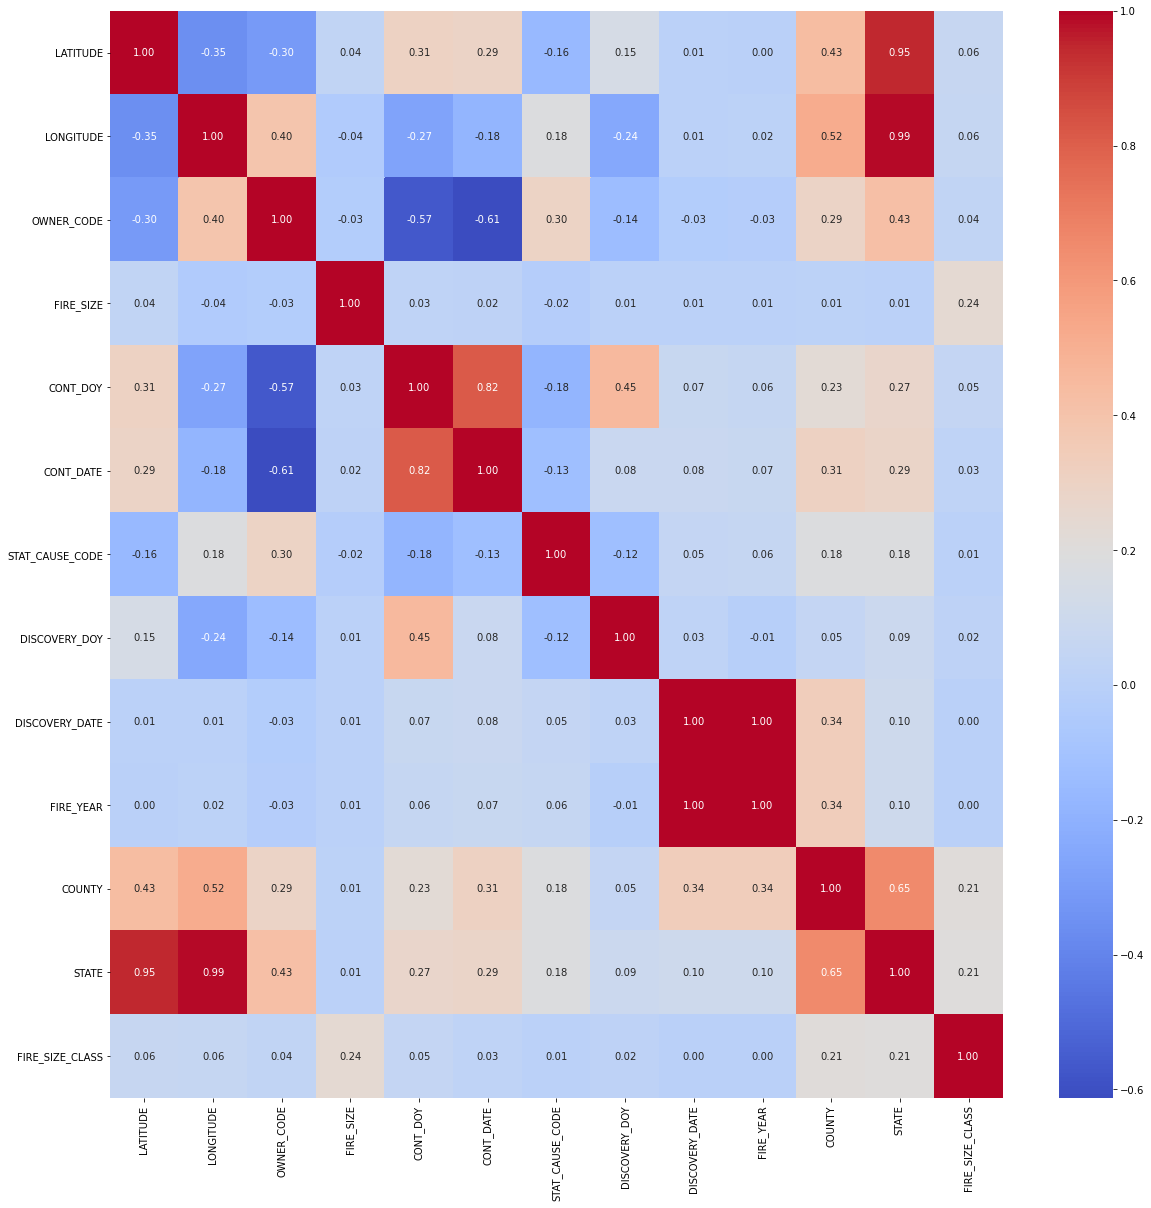

<Figure size 432x288 with 0 Axes>

In [11]:
plot_df = plot_df.fillna(0)
results = associations(plot_df,nominal_columns=catcols,return_results=True)
sns.despine()
g.figure.set_size_inches(14,10)
plt.show()

In [12]:
plot_df.isnull().sum()

LATITUDE           0
LONGITUDE          0
OWNER_CODE         0
FIRE_SIZE          0
CONT_DOY           0
CONT_DATE          0
STAT_CAUSE_CODE    0
DISCOVERY_DOY      0
DISCOVERY_DATE     0
FIRE_YEAR          0
COUNTY             0
STATE              0
FIRE_SIZE_CLASS    0
dtype: int64

In [13]:
print(df['STATE'].value_counts().sort_values(ascending=False).head(10))

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
Name: STATE, dtype: int64


In [14]:
df["STATE"].unique()

array(['CA', 'NM', 'OR', 'NC', 'WY', 'CO', 'WA', 'MT', 'UT', 'AZ', 'SD',
       'AR', 'NV', 'ID', 'MN', 'TX', 'FL', 'SC', 'LA', 'OK', 'KS', 'MO',
       'NE', 'MI', 'KY', 'OH', 'IN', 'VA', 'IL', 'TN', 'GA', 'AK', 'ND',
       'WV', 'WI', 'AL', 'NH', 'PA', 'MS', 'ME', 'VT', 'NY', 'IA', 'DC',
       'MD', 'CT', 'MA', 'NJ', 'HI', 'DE', 'PR', 'RI'], dtype=object)

In [15]:
print(df['FIRE_SIZE_CLASS'].value_counts().sort_values(ascending=False).head(10))

B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: FIRE_SIZE_CLASS, dtype: int64


In [16]:
df["FIRE_SIZE_CLASS"].unique()

array(['A', 'B', 'G', 'C', 'D', 'F', 'E'], dtype=object)

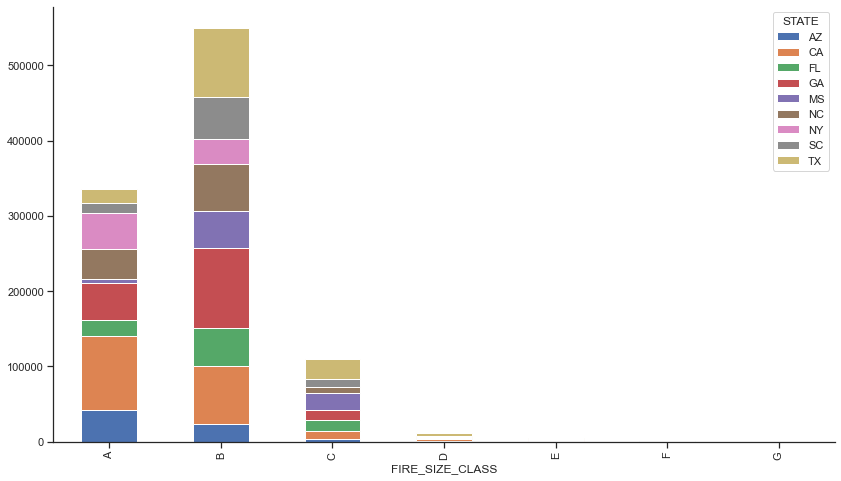

In [17]:
sns.set(style="ticks")

filtered_fire_df = df[(df['FIRE_SIZE_CLASS'].isin(['A', 'B',
       'C', 'D', 'E', 'F','G'])) &
                      (df['STATE'].isin(['CA', 'GA', 'TX',
       'NC', 'FL','SC','NY','MS','AZ']))
                     ]

df_plot = filtered_fire_df.groupby(['FIRE_SIZE_CLASS', 'STATE']).size().reset_index().pivot(columns='FIRE_SIZE_CLASS',
                                                                                         index='STATE',
                                                                                         values=0).reset_index()

g = df_plot.set_index('STATE').T.plot(kind='bar', stacked=True,
                                            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14, 8)
plt.show()

In [18]:
#df.info()
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   LATITUDE         float64
 1   LONGITUDE        float64
 2   OWNER_CODE       float64
 3   FIRE_SIZE        float64
 4   CONT_DOY         float64
 5   CONT_DATE        float64
 6   STAT_CAUSE_CODE  float64
 7   DISCOVERY_DOY    int64  
 8   DISCOVERY_DATE   float64
 9   FIRE_YEAR        int64  
 10  COUNTY           object 
 11  STATE            object 
 12  FIRE_SIZE_CLASS  object 
dtypes: float64(8), int64(2), object(3)
memory usage: 186.5+ MB


In [19]:
df.isnull().sum()

OBJECTID                           0
FOD_ID                             0
FPA_ID                             0
SOURCE_SYSTEM_TYPE                 0
SOURCE_SYSTEM                      0
NWCG_REPORTING_AGENCY              0
NWCG_REPORTING_UNIT_ID             0
NWCG_REPORTING_UNIT_NAME           0
SOURCE_REPORTING_UNIT              0
SOURCE_REPORTING_UNIT_NAME         0
LOCAL_INCIDENT_ID             820821
FIRE_NAME                     957189
FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                882638
STAT_CAUSE_CODE                    0
STAT_CAUSE_DESCR                   0
CONT_DATE                     891531
CONT_DOY                      891531
CONT_TIME                     972173
FIRE_SIZE                          0
FIRE_SIZE_CLASS                    0
LATITUDE                           0
LONGITUDE                          0
OWNER_CODE                         0
OWNER_DESCR                        0
S

In [20]:
df= df.replace(" ",np.nan)

In [21]:
df.isnull().sum()

OBJECTID                           0
FOD_ID                             0
FPA_ID                             0
SOURCE_SYSTEM_TYPE                 0
SOURCE_SYSTEM                      0
NWCG_REPORTING_AGENCY              0
NWCG_REPORTING_UNIT_ID             0
NWCG_REPORTING_UNIT_NAME           0
SOURCE_REPORTING_UNIT              0
SOURCE_REPORTING_UNIT_NAME         0
LOCAL_INCIDENT_ID             820822
FIRE_NAME                     957189
FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                882638
STAT_CAUSE_CODE                    0
STAT_CAUSE_DESCR                   0
CONT_DATE                     891531
CONT_DOY                      891531
CONT_TIME                     972173
FIRE_SIZE                          0
FIRE_SIZE_CLASS                    0
LATITUDE                           0
LONGITUDE                          0
OWNER_CODE                         0
OWNER_DESCR                        0
S

In [22]:
# Check for Nan values
df.isnull().values.any()
df1 = df[df.isna().any(axis=1)]
print("Num NAN values: {}".format(df1.shape[0]))

Num NAN values: 1628467


In [23]:
for col in ['CONT_TIME', 'FIRE_NAME', 'CONT_DOY', 'CONT_DATE', 
            'DISCOVERY_TIME', 'LOCAL_INCIDENT_ID', 'FIPS_NAME', 'COUNTY', 'FIPS_CODE']:
    df[col].fillna(0, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 32 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_INCIDENT_ID           object 
 11  FIRE_NAME                   object 
 12  FIRE_YEAR                   int64  
 13  DISCOVERY_DATE              float64
 14  DISCOVERY_DOY               int64  
 15  DISCOVERY_TIME              object 
 16  STAT_CAUSE_CODE             float64
 17  STAT_CAUSE_DESCR            object 
 18  CONT_DATE                   float64
 19  CONT_DOY             

# Modeling

## Fitting Linear Regression using sklearn

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 32 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_INCIDENT_ID           object 
 11  FIRE_NAME                   object 
 12  FIRE_YEAR                   int64  
 13  DISCOVERY_DATE              float64
 14  DISCOVERY_DOY               int64  
 15  DISCOVERY_TIME              object 
 16  STAT_CAUSE_CODE             float64
 17  STAT_CAUSE_DESCR            object 
 18  CONT_DATE                   float64
 19  CONT_DOY             

In [26]:
df.nunique()

OBJECTID                      1880465
FOD_ID                        1880465
FPA_ID                        1880462
SOURCE_SYSTEM_TYPE                  3
SOURCE_SYSTEM                      38
NWCG_REPORTING_AGENCY              11
NWCG_REPORTING_UNIT_ID           1640
NWCG_REPORTING_UNIT_NAME         1635
SOURCE_REPORTING_UNIT            4992
SOURCE_REPORTING_UNIT_NAME       4441
LOCAL_INCIDENT_ID              565914
FIRE_NAME                      493634
FIRE_YEAR                          24
DISCOVERY_DATE                   8766
DISCOVERY_DOY                     366
DISCOVERY_TIME                   1441
STAT_CAUSE_CODE                    13
STAT_CAUSE_DESCR                   13
CONT_DATE                        8761
CONT_DOY                          367
CONT_TIME                        1442
FIRE_SIZE                       13637
FIRE_SIZE_CLASS                     7
LATITUDE                       894061
LONGITUDE                      997536
OWNER_CODE                         16
OWNER_DESCR 

### Removing the following columns as similar attributes are present with no missing values.

In [27]:
# df = df.drop(['CONT_TIME', 'CONT_DOY', 
#               'CONT_DATE', 'DISCOVERY_TIME'], axis=1)

### Removing the columns which may not affect the model.

In [28]:
# df = df.drop(['FIRE_NAME', 'LOCAL_INCIDENT_ID', 
#               'FIPS_NAME' , 
#               'FIPS_CODE', 'NWCG_REPORTING_UNIT_NAME', 
#               'NWCG_REPORTING_UNIT_ID','NWCG_REPORTING_AGENCY', 
#               'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 
#               'SOURCE_SYSTEM','SOURCE_SYSTEM_TYPE', 
#               'FPA_ID', 'FOD_ID', 'OWNER_CODE', 'OWNER_DESCR', 
#               'COUNTY'], axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 32 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_INCIDENT_ID           object 
 11  FIRE_NAME                   object 
 12  FIRE_YEAR                   int64  
 13  DISCOVERY_DATE              float64
 14  DISCOVERY_DOY               int64  
 15  DISCOVERY_TIME              object 
 16  STAT_CAUSE_CODE             float64
 17  STAT_CAUSE_DESCR            object 
 18  CONT_DATE                   float64
 19  CONT_DOY             

In [30]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,PNF-47,FOUNTAIN,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,PIGEON,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,021,SLACK,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,6,DEER,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,7,STEVENOT,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


### From the above table we can observe that the vales in 'Shape' attribute are very long and not understandable, hence removing that column. Also, 'OBJECTID' is just the ID column and can be removed as well.

In [31]:
df = df.drop(['Shape', 'OBJECTID'], axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   FOD_ID                      int64  
 1   FPA_ID                      object 
 2   SOURCE_SYSTEM_TYPE          object 
 3   SOURCE_SYSTEM               object 
 4   NWCG_REPORTING_AGENCY       object 
 5   NWCG_REPORTING_UNIT_ID      object 
 6   NWCG_REPORTING_UNIT_NAME    object 
 7   SOURCE_REPORTING_UNIT       object 
 8   SOURCE_REPORTING_UNIT_NAME  object 
 9   LOCAL_INCIDENT_ID           object 
 10  FIRE_NAME                   object 
 11  FIRE_YEAR                   int64  
 12  DISCOVERY_DATE              float64
 13  DISCOVERY_DOY               int64  
 14  DISCOVERY_TIME              object 
 15  STAT_CAUSE_CODE             float64
 16  STAT_CAUSE_DESCR            object 
 17  CONT_DATE                   float64
 18  CONT_DOY                    float64
 19  CONT_TIME            

### The 'STAT_CAUSE_DESCR' column contains the description of 'STAT_CAUSE_CODE' and similarly, 'FIRE_SIZE_CLASS' contains the classification groups for the 'FIRE_SIZE'. Hence, we can remove the columns 'STAT_CAUSE_DESCR' and 'FIRE_SIZE_CLASS'.

In [33]:
# df = df.drop(['STAT_CAUSE_DESCR', 'FIRE_SIZE_CLASS'], axis=1)

In [34]:
df.head()

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,PNF-47,FOUNTAIN,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,PIGEON,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer
2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,021,SLACK,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado
3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,6,DEER,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine
4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,7,STEVENOT,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   FOD_ID                      int64  
 1   FPA_ID                      object 
 2   SOURCE_SYSTEM_TYPE          object 
 3   SOURCE_SYSTEM               object 
 4   NWCG_REPORTING_AGENCY       object 
 5   NWCG_REPORTING_UNIT_ID      object 
 6   NWCG_REPORTING_UNIT_NAME    object 
 7   SOURCE_REPORTING_UNIT       object 
 8   SOURCE_REPORTING_UNIT_NAME  object 
 9   LOCAL_INCIDENT_ID           object 
 10  FIRE_NAME                   int64  
 11  FIRE_YEAR                   int64  
 12  DISCOVERY_DATE              float64
 13  DISCOVERY_DOY               int64  
 14  DISCOVERY_TIME              object 
 15  STAT_CAUSE_CODE             float64
 16  STAT_CAUSE_DESCR            int64  
 17  CONT_DATE                   float64
 18  CONT_DOY                    float64
 19  CONT_TIME            

In [46]:
# Numerical features
num_cols = ['FIRE_YEAR','DISCOVERY_DATE','DISCOVERY_DOY', 
            'STAT_CAUSE_CODE','CONT_DATE','CONT_DOY','FIRE_SIZE',
            'LATITUDE','LONGITUDE']

# Categorical features
cat_cols = ['FPA_ID','SOURCE_SYSTEM_TYPE','SOURCE_SYSTEM',
            'NWCG_REPORTING_AGENCY','NWCG_REPORTING_UNIT_ID',
            'NWCG_REPORTING_UNIT_NAME','SOURCE_REPORTING_UNIT',
            'SOURCE_REPORTING_UNIT_NAME','LOCAL_INCIDENT_ID',
            'DISCOVERY_TIME','CONT_TIME','COUNTY','FIPS_CODE']

In [47]:
num_cols

['FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'STAT_CAUSE_CODE',
 'CONT_DATE',
 'CONT_DOY',
 'FIRE_SIZE',
 'LATITUDE',
 'LONGITUDE']

In [48]:
cat_cols

['FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_INCIDENT_ID',
 'DISCOVERY_TIME',
 'CONT_TIME',
 'COUNTY',
 'FIPS_CODE']

In [ ]:
#df2 = df[cat_cols]

In [ ]:
#df2 = df2.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [ ]:
#df2.info()

In [49]:
# Label Encoding for the categorical columns
from sklearn.preprocessing import LabelEncoder

#Label encoding Binary columns and multi columns
le = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)), 
                                  axis=0, result_type='expand')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   FOD_ID                      int64  
 1   FPA_ID                      int64  
 2   SOURCE_SYSTEM_TYPE          int64  
 3   SOURCE_SYSTEM               int64  
 4   NWCG_REPORTING_AGENCY       int64  
 5   NWCG_REPORTING_UNIT_ID      int64  
 6   NWCG_REPORTING_UNIT_NAME    int64  
 7   SOURCE_REPORTING_UNIT       int64  
 8   SOURCE_REPORTING_UNIT_NAME  int64  
 9   LOCAL_INCIDENT_ID           int64  
 10  FIRE_NAME                   int64  
 11  FIRE_YEAR                   int64  
 12  DISCOVERY_DATE              float64
 13  DISCOVERY_DOY               int64  
 14  DISCOVERY_TIME              int64  
 15  STAT_CAUSE_CODE             float64
 16  STAT_CAUSE_DESCR            int64  
 17  CONT_DATE                   float64
 18  CONT_DOY                    float64
 19  CONT_TIME            

In [51]:
# Creating the varibales X and y.

# X= np.concatenate( (df['DISCOVERY_DATE'].values.reshape(-1,1),df['DISCOVERY_DOY'].values.reshape(-1,1), 
#                      df['STAT_CAUSE_CODE'].values.reshape(-1,1),
#                    df['LATITUDE'].values.reshape(-1,1), df['LONGITUDE'].values.reshape(-1,1)), axis = 1 )
# y= df['FIRE_SIZE'].values
# print(y[0:3])
# print(X.shape)

X = df.drop('FIRE_SIZE', axis=1).values
y= df['FIRE_SIZE'].values
print(y[0:3])
print(X.shape)

[0.1  0.25 0.1 ]
(1880465, 29)


In [52]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X = sc.fit_transform(X)

In [53]:
# Importing the necessary modules.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as MAE

# Splitting the dataframe to create a training and testing data set.
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.05)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.10)
print("# Train: {} , #Test: {}".format(X_train.shape[0], X_test.shape[0]))
print("# inputs: {}".format(X_train.shape[1]))
n = X_train.shape[1]

# Train: 1692418 , #Test: 188047
# inputs: 29


In [ ]:
# print (X_train.shape[0])
# print (y_train.shape[0])
# print (X_test.shape[0])
# print (y_test.shape[0])

In [54]:
from sklearn.linear_model import LinearRegression

# This creates a LinearRegression object
lm = LinearRegression()

# Fit a linear model, calculate the root mean squared error 
# and the R2 score.
lm.fit(X_train, y_train)

y_train_predict  = lm.predict(X_train)
y_test_predict = lm.predict(X_test)

# Metrics for evaluation for train set.
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2_train = r2_score(y_train, y_train_predict)

# Metrics for evaluation for test set.
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2 = r2_score(y_test, y_test_predict)

print('Root mean squared error on Training Set', rmse_train)
print('R2 score on Training Set: ', r2_train)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Training Set 2454.698914509836
R2 score on Training Set:  0.0349028104829876
Root mean squared error on Testing Set 2443.245081187838
R2 score on Testing Set:  0.035441084333823536


In [55]:
# Writing a function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [58]:
# Mean absolute error (MAE).
print('The MAE of the training set is ',
       MAE(y_train, y_train_predict))
print('The MAE of the testing set is ',
       MAE(y_test, y_test_predict))
# Mean absolute percentage error (MAPE).
print('The MAPE of the training set is ', 
      mean_absolute_percentage_error(y_train, y_train_predict))
print('The MAPE of the testing set is ',
      mean_absolute_percentage_error(y_test, y_test_predict))

The MAE of the training set is  340.55613691121874
The MAE of the testing set is  339.63693385324353
The MAPE of the training set is  165025.02336098862
The MAPE of the testing set is  162134.47460178062


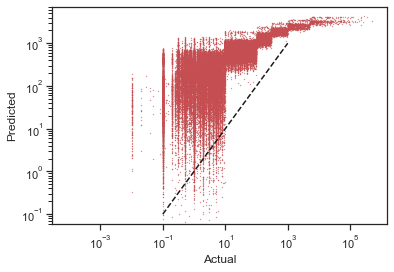

In [57]:
# Predicted vs Actual scatterplot

plt.scatter(y_test, y_test_predict, s=0.3, marker='.', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')

Automatically created module for IPython interactive environment


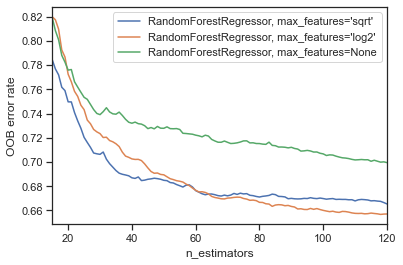

In [68]:
import warnings
warnings.filterwarnings('ignore')

from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor

print(__doc__)

RANDOM_STATE = 42

ensemble_clfs = [
    ("RandomForestRegressor, max_features='sqrt'",
        RandomForestRegressor(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features='log2'",
        RandomForestRegressor(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features=None",
        RandomForestRegressor(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a regressor name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 120

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [73]:
#Setting the n_estimators to 120

clf.set_params(n_estimators=120, max_features='sqrt',
              bootstrap = True,
              warm_start=False,
              oob_score=False)

RandomForestRegressor(max_features='sqrt', n_estimators=120, random_state=42)

In [74]:
# Training the Algorithm

clf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=120, random_state=42)

In [75]:
# Predicting on the train set
y_train_predicted_rf = clf.predict(X_train)
# Predicting on the test set
y_test_predicted_rf = clf.predict(X_test)

# The Root mean squared error for train set.
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted_rf))
# The Root mean squared error for test set.
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted_rf))
                    
# R2 score for train set.
r2_train_rf = r2_score(y_train, y_train_predicted_rf)
# R2 score for test set.
r2_test_rf = r2_score(y_test, y_test_predicted_rf)

print("Root Mean squared error for train set: ", rmse_train)  
print("Root Mean squared error for test set: ", rmse_test)  
print('R2 score for train set: ', r2_train_rf)
print('R2 score for test set: ', r2_test_rf)

Root Mean squared error for train set:  744.883014299441
Root Mean squared error for test set:  2001.0971066507595
R2 score for train set:  0.911130910233027
R2 score for test set:  0.35296016098852456


In [76]:
# Mean absolute error (MAE).
print('The MAE of the training set is ',
       MAE(y_train, y_train_predicted_rf))
print('The MAE of the testing set is ',
       MAE(y_test, y_test_predicted_rf))

# Mean absolute percentage error (MAPE) for Random Forest Regressor Model
print('The MAPE of the training set is ', 
      mean_absolute_percentage_error(y_train, y_train_predicted_rf))
print('The MAPE of the testing set is ',
      mean_absolute_percentage_error(y_test, y_test_predicted_rf))

The MAE of the training set is  21.264181070191167
The MAE of the testing set is  60.03909864580087
The MAPE of the training set is  696.2681724646188
The MAPE of the testing set is  1886.2840229250448


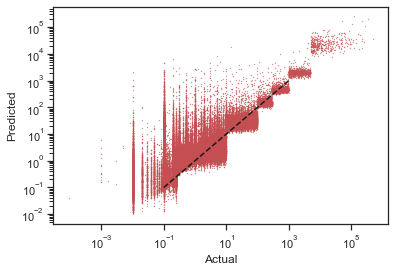

In [77]:
# Predicted vs Actual scatterplot

plt.scatter(y_test, y_test_predicted_rf, s=0.3, marker='.', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')

In [60]:
# SVM
from sklearn import svm

n = 10000
svm_reg = svm.SVR(kernel='rbf', degree=3, gamma='auto')

svm_reg.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_train_predict_svm  = svm_reg.predict(X_train[0:n,:])
y_test_predict_svm = svm_reg.predict(X_test[0:n,:])

# Metrics for evaluation for train set.
rmse_train_svm = np.sqrt(mean_squared_error(y_train[0:n], y_train_predict_svm))
r2_train_svm = r2_score(y_train[0:n], y_train_predict_svm)

# Metrics for evaluation for test set.
rmse_svm = np.sqrt(mean_squared_error(y_test[0:n], y_test_predict_svm))
r2_svm = r2_score(y_test[0:n], y_test_predict_svm)

print('Root mean squared error on Training Set', rmse_train_svm)
print('R2 score on Training Set: ', r2_train_svm)

print('Root mean squared error on Testing Set', rmse_svm)
print('R2 score on Testing Set: ', r2_svm)
print('----------------------------------------------------------')

# Mean absolute error (MAE).
print('The MAE of the training set is ',
       MAE(y_train[0:n], y_train_predict_svm))
print('The MAE of the testing set is ',
       MAE(y_test[0:n], y_test_predict_svm))

# Mean absolute percentage error (MAPE).
print('The MAPE of the training set is ', 
      mean_absolute_percentage_error(y_train[0:n], y_train_predict_svm))
print('The MAPE of the testing set is ',
      mean_absolute_percentage_error(y_test[0:n], y_test_predict_svm))

Root mean squared error on Training Set 1187.0878696482725
R2 score on Training Set:  0.0004971747783385494
Root mean squared error on Testing Set 895.1173745300173
R2 score on Testing Set:  0.0009824199839501002
----------------------------------------------------------
The MAE of the training set is  50.13075791397564
The MAE of the testing set is  45.50848943510159
The MAPE of the training set is  180.53483508352448
The MAPE of the testing set is  220.13237741331398


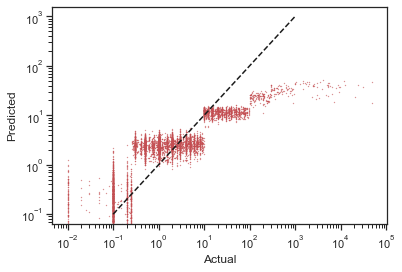

In [61]:
# Predicted vs Actual scatterplot

plt.scatter(y_test[0:n], y_test_predict_svm, s=0.3, marker='.', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')

In [62]:
# K Nearest Neighbours
from sklearn.neighbors import KNeighborsRegressor

n = 50000

for nbs in [3,5,10,15,20]:
    for wts in ['distance','uniform']:
        K_nn = KNeighborsRegressor(n_neighbors=nbs,
                                   weights=wts)

        K_nn.fit(X_train[0:n,:],y_train[0:n].reshape(-1))
        y_train_predict_knn = K_nn.predict(X_train[0:n,:])
        y_test_predict_knn = K_nn.predict(X_test[0:n,:])

        print("nbs: {}, wts: {}".format(nbs, wts))
        print("MAE Train: {}".format(MAE(y_train[0:n],y_train_predict_knn)))
        print("MAE Test: {}".format(MAE(y_test[0:n],y_test_predict_knn)))
        print("r2 Train: {}".format(r2_score(y_train[0:n],y_train_predict_knn)))
        print("r2 Test: {}".format(r2_score(y_test[0:n],y_test_predict_knn)))
        print("---------------------------------------")

nbs: 3, wts: distance
MAE Train: 0.0
MAE Test: 57.43545544984153
r2 Train: 1.0
r2 Test: 0.19050809860261464
---------------------------------------
nbs: 3, wts: uniform
MAE Train: 43.757944009533325
MAE Test: 57.81063051493334
r2 Train: 0.5506980023067015
r2 Test: 0.17807636217639455
---------------------------------------
nbs: 5, wts: distance
MAE Train: 0.0
MAE Test: 51.97033362302926
r2 Train: 1.0
r2 Test: 0.2853509540063044
---------------------------------------
nbs: 5, wts: uniform
MAE Train: 49.157044159319994
MAE Test: 51.92039643839999
r2 Train: 0.4407027639512513
r2 Test: 0.28213116672521665
---------------------------------------
nbs: 10, wts: distance
MAE Train: 0.0
MAE Test: 50.44938685935723
r2 Train: 1.0
r2 Test: 0.32831785100789235
---------------------------------------
nbs: 10, wts: uniform
MAE Train: 52.95310195436
MAE Test: 50.622087305699985
r2 Train: 0.3281095351835337
r2 Test: 0.323451442852156
---------------------------------------
nbs: 15, wts: distance
MAE Tr

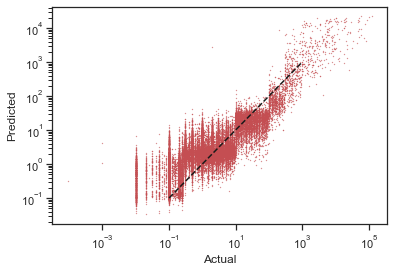

In [63]:
# Predicted vs Actual scatterplot

plt.scatter(y_test[0:n], y_test_predict_knn, s=0.3, marker='.', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')

In [64]:
# Decision Tree
from sklearn import tree

tree_clf = tree.DecisionTreeRegressor(criterion='mae')

tree_clf.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_train_predict_dt = tree_clf.predict(X_train[0:n,:])
y_test_predict_dt = tree_clf.predict(X_test[0:n,:])

print("MAE Train: {}".format(MAE(y_train[0:n],y_train_predict_dt)))
print("MAE Test: {}".format(MAE(y_test[0:n],y_test_predict_dt)))
print("r2 Train: {}".format(r2_score(y_train[0:n],y_train_predict_dt)))
print("r2 Test: {}".format(r2_score(y_test[0:n],y_test_predict_dt)))
print("---------------------------------------")

MAE Train: 0.1339204636
MAE Test: 55.833016665
r2 Train: 0.9999998625520906
r2 Test: -0.2620406081620894
---------------------------------------


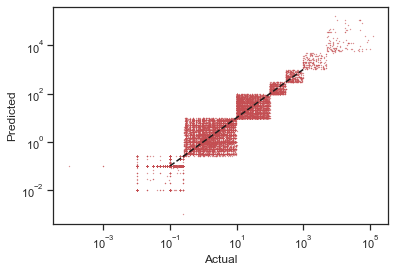

In [65]:
# Predicted vs Actual scatterplot

plt.scatter(y_test[0:n], y_test_predict_dt, s=0.3, marker='.', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')

In [66]:
# Stacked regressors
from mlxtend.regressor import StackingRegressor

n = 100000

estimators = [lm, tree_clf, K_nn, svm_reg]

regStack = StackingRegressor(regressors=estimators,
                            meta_regressor = lm)

regStack.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_train_predict_regStack = regStack.predict(X_train[0:n,:])
y_test_predict_regStack = regStack.predict(X_test[0:n,:])

print("MAE Train: {}".format(MAE(y_train[0:n],y_train_predict_regStack)))
print("MAE Test: {}".format(MAE(y_test[0:n],y_test_predict_regStack)))
print("r2 Train: {}".format(r2_score(y_train[0:n],y_train_predict_regStack)))
print("r2 Test: {}".format(r2_score(y_test[0:n],y_test_predict_regStack)))
print("---------------------------------------")

MAE Train: 0.07913792962581707
MAE Test: 67.55933232911408
r2 Train: 0.9999999429062636
r2 Test: 0.002089361149933966
---------------------------------------


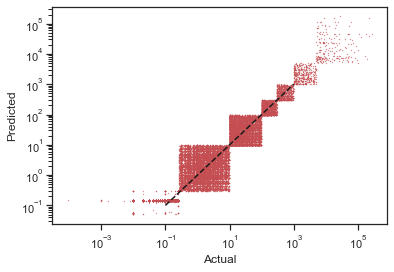

In [67]:
# Predicted vs Actual scatterplot

plt.scatter(y_test[0:n], y_test_predict_regStack, s=0.3, marker='.', c='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')